## Familiarizarse con las tablas

In [122]:
import pandas as pd
# Reintentar cargar el CSV con otra codificación
ruta_csv = "/content/sample_data/tabla_preparada_modelo.csv"
try:
    df = pd.read_csv(ruta_csv, encoding='latin1')
    print("Archivo cargado con éxito usando la codificación 'latin1'.")
except UnicodeDecodeError:
    df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    print("Archivo cargado con éxito usando la codificación 'ISO-8859-1'.")

# Ver las primeras filas para familiarizarnos con los datos
print("Primeras filas del DataFrame:")
print(df.head())

# Resumen de las columnas y sus tipos de datos
print("\nResumen de columnas y tipos de datos:")
print(df.info())

# Revisar valores únicos por columna
print("\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} únicos")

# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Archivo cargado con éxito usando la codificación 'latin1'.
Primeras filas del DataFrame:
    NOMBDEP     NOMBPROV  NOMBDIST    MES  TEMP_MAX  \
0  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   
1  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   
2  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   
3  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   
4  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   

                             Clasificacion_Climatica  TIZON_PROMEDIO  \
0  Lluvioso con humedad abundante todas las estac...       91.931034   
1  Lluvioso con humedad abundante todas las estac...       91.931034   
2  Lluvioso con humedad abundante todas las estac...       91.931034   
3  Lluvioso con humedad abundante todas las estac...       91.931034   
4  Lluvioso con humedad abundante todas las estac...       91.931034   

   TEMP_MIN  PRECIPITACION  UBIGEO  NEVADA  EROSION_PROMEDIO     AÑO  \
0  0.554848        0.46179   10102     0.0          0.083869  2018.0   
1  

Distribución de las variedades de producto:
PRODUCTO
Yungay           1380
Huayro           1098
Canchan-INIA      966
Amarilis-INIA     474
Perricholi        241
UNICA              80
Name: count, dtype: int64

Distribución de Clasificacion_Climatica:
Clasificacion_Climatica
Lluvioso con humedad abundante todas las estaciones del a                      2434
Semiseco con humedad abundante todas las estaciones del a                       664
Lluvioso con oto                                                                543
Semiseco con invierno seco. Frao.                                               205
Erido con deficiencia de humedad en todas las estaciones del aoo. Templado.     120
Semiseco con oto o e invierno secos. Frso.                                      116
Muy lluvioso con humedad abundante todas las estaciones del aSo. Templado.       80
Semi)rido con invierno seco. Frro.                                               31
Semi)rido con invierno seco. Templado.             

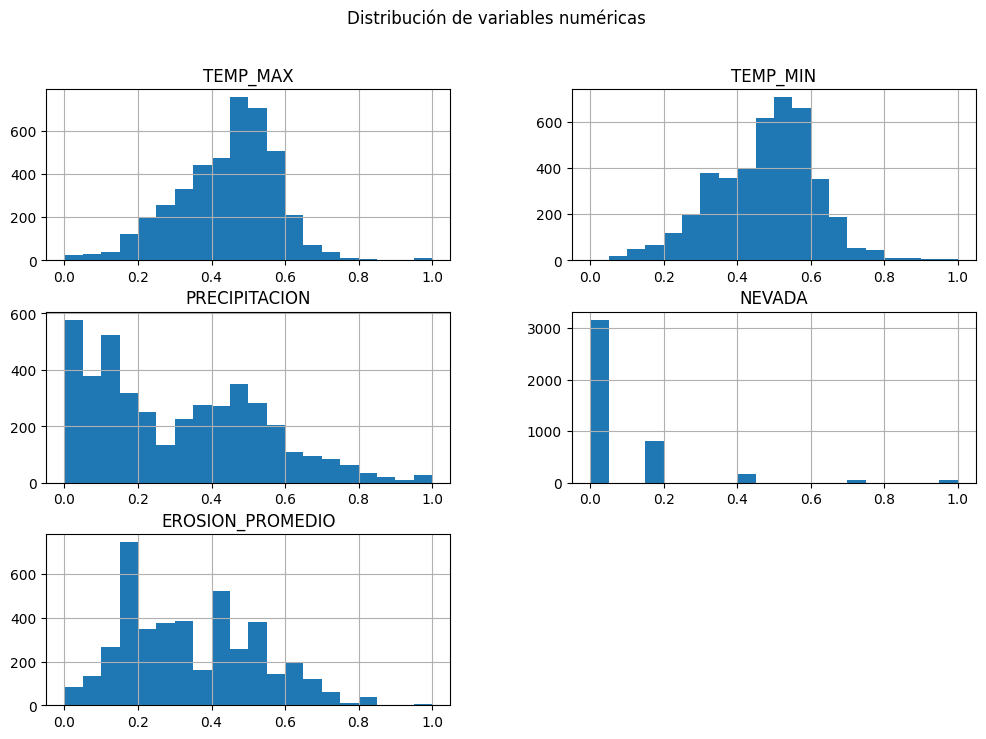

In [123]:
import matplotlib.pyplot as plt

# Distribución de la columna PRODUCTO
print("Distribución de las variedades de producto:")
print(df['PRODUCTO'].value_counts())

# Distribución de Clasificacion_Climatica
print("\nDistribución de Clasificacion_Climatica:")
print(df['Clasificacion_Climatica'].value_counts())

# Histograma de las variables numéricas principales
variables_numericas = ['TEMP_MAX', 'TEMP_MIN', 'PRECIPITACION', 'NEVADA', 'EROSION_PROMEDIO']
df[variables_numericas].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribución de variables numéricas")
plt.show()


# CLASIFICACION

In [124]:
from sklearn.preprocessing import OneHotEncoder

# Selección de columnas categóricas
categorical_columns = ['Clasificacion_Climatica', 'PRODUCTO']

# Aplicar One-Hot Encoding usando pandas
df_onehot = pd.get_dummies(df, columns=categorical_columns)

print("Columnas después del One-Hot Encoding:")
print(df_onehot.columns)

# Verificar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame después del One-Hot Encoding:")
print(df_onehot.head())


Columnas después del One-Hot Encoding:
Index(['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'MES', 'TEMP_MAX', 'TIZON_PROMEDIO',
       'TEMP_MIN', 'PRECIPITACION', 'UBIGEO', 'NEVADA', 'EROSION_PROMEDIO',
       'AÑO', 'SIEMBRA', 'COSECHA', 'PRODUCCION', 'PRECIO_CHACRA',
       'PRODUCTO_CODE', 'CLIMA_CODE',
       'Clasificacion_Climatica_Erido con deficiencia de humedad en todas las estaciones del aoo. Templado.',
       'Clasificacion_Climatica_Lluvioso con humedad abundante todas las estaciones del a',
       'Clasificacion_Climatica_Lluvioso con oto',
       'Clasificacion_Climatica_Muy lluvioso con humedad abundante todas las estaciones del aSo. Templado.',
       'Clasificacion_Climatica_Semi)rido con invierno seco. Frro.',
       'Clasificacion_Climatica_Semi)rido con invierno seco. Templado.',
       'Clasificacion_Climatica_Semiseco con humedad abundante todas las estaciones del a',
       'Clasificacion_Climatica_Semiseco con invierno seco. Frao.',
       'Clasificacion_Climatica_Semis

In [125]:
ruta_variedades = "/content/sample_data/Variedad_a_Caracteristicas.csv"
df_variedades = pd.read_csv(ruta_variedades, encoding='latin1')

# Revisar el contenido del archivo
print("Contenido del archivo Variedad_a_Caracteristicas.csv:")
print(df_variedades.head())

# Verificar columnas con valores nulos
print("\nValores nulos por columna en el archivo de variedades:")
print(df_variedades.isnull().sum())


Contenido del archivo Variedad_a_Caracteristicas.csv:
  ï»¿Variety;Late blight (LB);Predominant tuber flesh color;Tuber shape depth of eyes;Dry matter (%);Growing period highland
0         Perricholi;MR;Cream;Slightly deep eye;19;M                                                                        
1  Canchan-INIA;MR;Pale Yellow;Slightly deep eye;...                                                                        
2     Amarilis-INIA;MR;Pale Yellow;Shallow eyes;21;M                                                                        
3                    UNICA;S;Cream;Shallow eyes;21;M                                                                        
4                                       Yungay;R;;;;                                                                        

Valores nulos por columna en el archivo de variedades:
ï»¿Variety;Late blight (LB);Predominant tuber flesh color;Tuber shape depth of eyes;Dry matter (%);Growing period highland    0
dtype: int64

In [126]:
# Intentar cargar el archivo con el delimitador correcto
ruta_variedades = "/content/sample_data/Variedad_a_Caracteristicas.csv"

# Intentar cargar con delimitador ";"
try:
    df_variedades = pd.read_csv(ruta_variedades, encoding='latin1', delimiter=';')
    print("Archivo cargado correctamente con ';' como delimitador.")
except Exception as e:
    print("Error al cargar el archivo con ';':", e)

# Verificar las primeras filas y columnas del archivo corregido
print("\nUNICAS FILAS:")
print(df_variedades)



Archivo cargado correctamente con ';' como delimitador.

UNICAS FILAS:
      ï»¿Variety Late blight (LB) Predominant tuber flesh color  \
0     Perricholi               MR                         Cream   
1   Canchan-INIA               MR                   Pale Yellow   
2  Amarilis-INIA               MR                   Pale Yellow   
3          UNICA                S                         Cream   
4         Yungay                R                           NaN   
5         Huayro               MR                           NaN   

  Tuber shape depth of eyes  Dry matter (%) Growing period highland  
0         Slightly deep eye            19.0                       M  
1         Slightly deep eye            23.0                       L  
2              Shallow eyes            21.0                       M  
3              Shallow eyes            21.0                       M  
4                       NaN             NaN                     NaN  
5                       NaN            

## Entrenamiento sin huario ni yungai

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5152 - loss: 1.2263 - val_accuracy: 0.5532 - val_loss: 0.9588
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5683 - loss: 0.9369 - val_accuracy: 0.6489 - val_loss: 0.8220
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6102 - loss: 0.8279 - val_accuracy: 0.6809 - val_loss: 0.7321
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6579 - loss: 0.7354 - val_accuracy: 0.6773 - val_loss: 0.6929
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6675 - loss: 0.7211 - val_accuracy: 0.6844 - val_loss: 0.6742
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6918 - loss: 0.6685 - val_accuracy: 0.6915 - val_loss: 0.6422
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.6656 - val_accuracy: 0.7270 - val_loss: 0.6225
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6806 - loss: 0.6504 - val_accuracy: 0.7021 - val_loss: 0.6

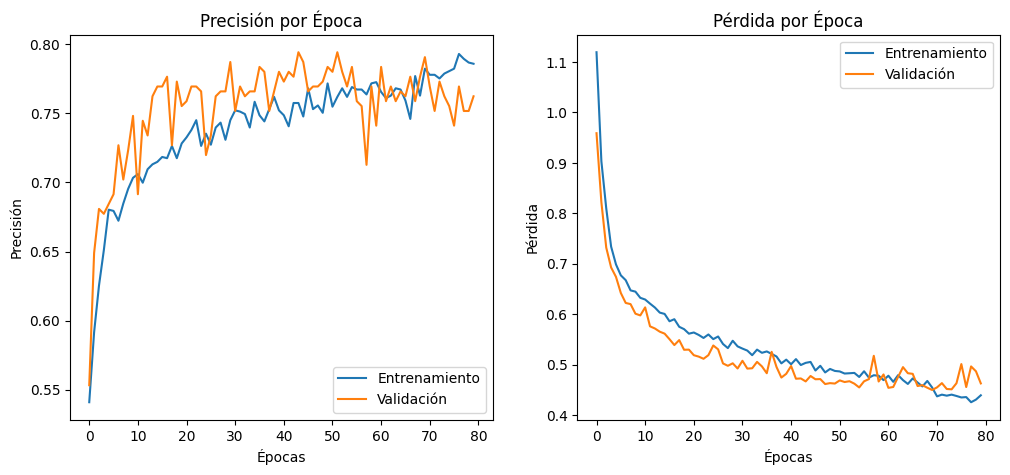

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

# Cargar los datos
ruta_csv = "/content/sample_data/tabla_preparada_modelo.csv"
df = pd.read_csv(ruta_csv, encoding='latin1')

# Filtrar productos eliminando "Yungay" y "Huayro"
df_filtered = df[~df['PRODUCTO'].isin(['Yungay', 'Huayro'])]

# Seleccionar características y etiquetas
features = ['TEMP_MAX', 'TEMP_MIN', 'PRECIPITACION', 'NEVADA', 'EROSION_PROMEDIO',
            'CLIMA_CODE', 'TIZON_PROMEDIO', 'SIEMBRA', 'COSECHA', 'PRECIO_CHACRA']
X = df_filtered[features].values
y = df_filtered['PRODUCTO'].values

# One-Hot Encoding para las etiquetas
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y, random_state=42
)

# Normalizar las características
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Nueva capa con 128 neuronas
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Definir EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Loss en prueba: {test_loss}")
print(f"Accuracy en prueba: {test_accuracy}")

# Graficar el accuracy y el loss
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


### HALLAR MEJORS COMBINACIONES

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
import itertools
from joblib import Parallel, delayed

# Función para entrenar un modelo con una combinación de variedades
def train_combination(varieties, df, features):
    # Filtrar el dataset para las variedades seleccionadas
    df_filtered = df[df['PRODUCTO'].isin(varieties)]

    # Preparar datos
    X = df_filtered[features].values
    y = df_filtered['PRODUCTO'].values

    # One-Hot Encoding de las etiquetas
    encoder = OneHotEncoder(sparse_output=False)
    y_encoded = encoder.fit_transform(y.reshape(-1, 1))

    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, stratify=y, random_state=42
    )

    # Normalizar características
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Crear modelo
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(varieties), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

    # Evaluar el modelo
    _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    return [list(varieties), accuracy]

# Cargar los datos
ruta_csv = "/content/sample_data/tabla_preparada_modelo.csv"
df = pd.read_csv(ruta_csv, encoding='latin1')

# Seleccionar características relevantes
features = ['TEMP_MAX', 'TEMP_MIN', 'PRECIPITACION', 'NEVADA', 'EROSION_PROMEDIO',
            'CLIMA_CODE', 'TIZON_PROMEDIO', 'SIEMBRA', 'COSECHA', 'PRECIO_CHACRA']

# Obtener todas las variedades
all_varieties = df['PRODUCTO'].unique()

# Generar todas las combinaciones de 2 a 6 variedades
combinations = []
for r in range(2, len(all_varieties) + 1):
    combinations.extend(itertools.combinations(all_varieties, r))

# Entrenar modelos en paralelo para todas las combinaciones
results = Parallel(n_jobs=-1)(delayed(train_combination)(comb, df, features) for comb in combinations)

# Ordenar los resultados por accuracy de mayor a menor
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)


KeyboardInterrupt: 

In [ ]:
# Mostrar las mejores combinaciones
print("Mejores combinaciones de variedades por accuracy:")
for comb in results_sorted[:25]:  # Mostramos las 10 mejores
    print(f"Variedades: {comb[0]} - Accuracy: {comb[1]:.4f}")

## analisis de las columnas

Importancia de características (Random Forest):
            Feature  Importance
4  EROSION_PROMEDIO    0.198658
6    TIZON_PROMEDIO    0.136862
0          TEMP_MAX    0.120967
1          TEMP_MIN    0.117191
2     PRECIPITACION    0.114167
5        CLIMA_CODE    0.101721
7           SIEMBRA    0.062996
8           COSECHA    0.060635
9     PRECIO_CHACRA    0.057765
3            NEVADA    0.029038


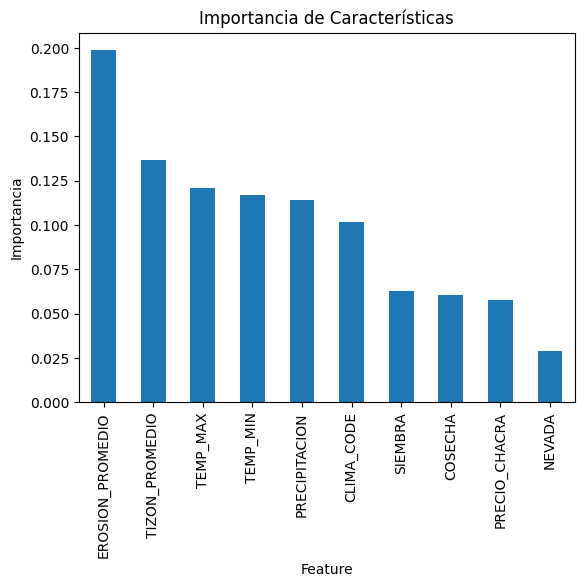

In [129]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Crear un Random Forest para evaluar la importancia de las características
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train.argmax(axis=1))  # Convertimos One-Hot a índices de clase

# Obtener las importancias
importances = rf.feature_importances_

# Crear un DataFrame para mostrar las importancias
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Importancia de características (Random Forest):")
print(importance_df)

# Graficar la importancia de características
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title="Importancia de Características")
plt.ylabel("Importancia")
plt.show()


# solo tizon

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6285 - loss: 0.8378 - val_accuracy: 0.6318 - val_loss: 0.6966
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6655 - loss: 0.6709 - val_accuracy: 0.6348 - val_loss: 0.6676
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6649 - loss: 0.6514 - val_accuracy: 0.6465 - val_loss: 0.6511
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6854 - loss: 0.6324 - val_accuracy: 0.6465 - val_loss: 0.6440
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.6150 - val_accuracy: 0.6465 - val_loss: 0.6544
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6965 - loss: 0.6100 - val_accuracy: 0.6480 - val_loss: 0.6429
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6833 - loss: 0.6154 - val_accuracy: 0.6554 - val_loss: 0.6435
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6846 - loss: 0.6238 - val_accuracy: 0.6524 - val_loss: 0.6

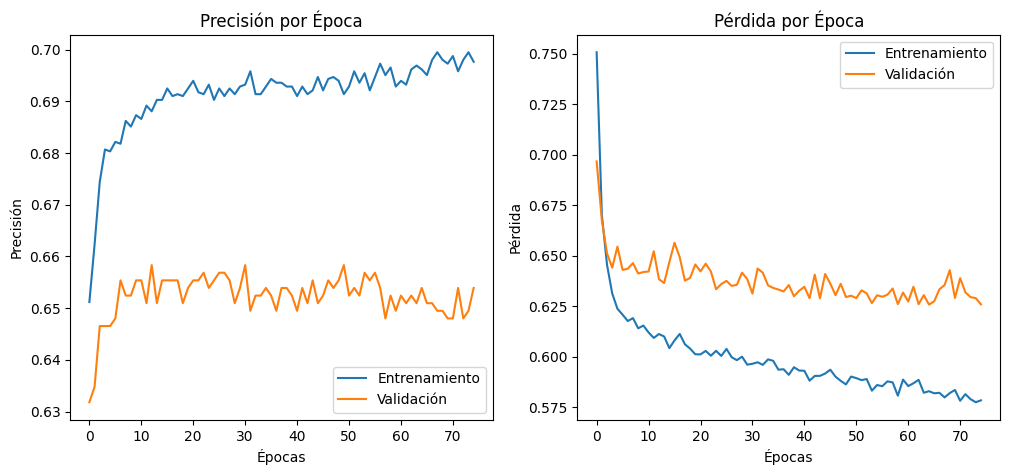

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

# Rutas de los archivos
ruta_modelo = "/content/sample_data/tabla_preparada_modelo.csv"
ruta_variedades = "/content/sample_data/Variedad_a_Caracteristicas.csv"

# Cargar los datasets
df_modelo = pd.read_csv(ruta_modelo, encoding='latin1')
df_variedades = pd.read_csv(ruta_variedades, encoding='latin1', delimiter=';')

# Renombrar la columna que contiene las variedades
df_variedades.rename(columns={'ï»¿Variety': 'Variety'}, inplace=True)

# Seleccionar columnas relevantes del archivo de variedades
df_variedades = df_variedades[['Variety', 'Late blight (LB)']]

# Mapear resistencia al tizón en el dataset principal
df_modelo = df_modelo.merge(df_variedades, left_on='PRODUCTO', right_on='Variety', how='inner')

# Filtrar columnas relevantes
features = ['TEMP_MAX', 'TEMP_MIN', 'PRECIPITACION', 'NEVADA', 'EROSION_PROMEDIO',
            'CLIMA_CODE', 'TIZON_PROMEDIO', 'SIEMBRA', 'COSECHA', 'PRECIO_CHACRA']
X = df_modelo[features].values

# One-Hot Encoding para la resistencia al tizón (Late blight - LB)
y = df_modelo['Late blight (LB)'].values
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y, random_state=42
)

# Normalizar características
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Agregar dropout para prevenir overfitting
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Definir EarlyStopping para evitar sobreentrenamiento
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Loss en prueba: {test_loss}")
print(f"Accuracy en prueba: {test_accuracy}")

# Graficar el accuracy y el loss
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


# Para la predicicon de vectores

Quitamos a yungay y huairo por no tener completas su caracteristicas

### Empezamso con el match y de pasada a la 2 tabla de 26 papas

In [135]:
import pandas as pd

# Rutas de los datasets
ruta_modelo = "/content/sample_data/tabla_preparada_modelo.csv"
ruta_variedades = "/content/sample_data/Variedad_a_Caracteristicas.csv"
ruta_variedades_28 = "/content/sample_data/Variedad_a_Caracteristicas_28.csv"

# Cargar los datasets
df_modelo = pd.read_csv(ruta_modelo, encoding='latin1')
df_variedades = pd.read_csv(ruta_variedades, encoding='latin1', delimiter=';')
df_variedades_28 = pd.read_csv(ruta_variedades_28, encoding='latin1', delimiter=';')

# Renombrar columnas para facilitar su uso
df_variedades.rename(columns={'ï»¿Variety': 'Variety'}, inplace=True)
df_variedades_28.rename(columns={'ï»¿Variety': 'Variety'}, inplace=True)

# Mostrar primeras filas de cada dataset
print("Primeras filas de df_modelo:")
print(df_modelo.head())

print("\nPrimeras filas de Variedad_a_Caracteristicas:")
print(df_variedades.head())

print("\nPrimeras filas de Variedad_a_Caracteristicas_28:")
print(df_variedades_28.head())


Primeras filas de df_modelo:
    NOMBDEP     NOMBPROV  NOMBDIST    MES  TEMP_MAX  \
0  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   
1  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   
2  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   
3  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   
4  AMAZONAS  CHACHAPOYAS  ASUNCION  ENERO  0.453846   

                             Clasificacion_Climatica  TIZON_PROMEDIO  \
0  Lluvioso con humedad abundante todas las estac...       91.931034   
1  Lluvioso con humedad abundante todas las estac...       91.931034   
2  Lluvioso con humedad abundante todas las estac...       91.931034   
3  Lluvioso con humedad abundante todas las estac...       91.931034   
4  Lluvioso con humedad abundante todas las estac...       91.931034   

   TEMP_MIN  PRECIPITACION  UBIGEO  NEVADA  EROSION_PROMEDIO     AÑO  \
0  0.554848        0.46179   10102     0.0          0.083869  2018.0   
1  0.554848        0.46179   10102     0.0          0.083869  2

In [ ]:
df_modelo

SE mapea los ordinales y cardinales

In [136]:
from sklearn.preprocessing import MinMaxScaler

# Mapeo de valores ordinales
ordinal_mapping = {
    'Late blight (LB)': {'HS': 0, 'S': 1, 'MR': 2, 'R': 3},
    'Growing period highland': {'E': 0, 'M': 1, 'L': 2}
}

# Mapear columnas ordinales en ambas tablas
for col, mapping in ordinal_mapping.items():
    df_variedades[col] = df_variedades[col].map(mapping)
    df_variedades_28[col] = df_variedades_28[col].map(mapping)

# Corregir la normalización de Dry matter (%)
df_variedades['Dry matter (%)'] = df_variedades['Dry matter (%)'] / 100
df_variedades_28['Dry matter (%)'] = df_variedades_28['Dry matter (%)'] / 100

# Mostrar resultados para verificar la corrección
print("\nVariedad_a_Caracteristicas después de corregir Dry matter (%):")
print(df_variedades[['Variety', 'Dry matter (%)', 'Growing period highland']].head())

print("\nVariedad_a_Caracteristicas_28 después de corregir Dry matter (%):")
print(df_variedades_28[['Variety', 'Dry matter (%)', 'Growing period highland']].head())




Variedad_a_Caracteristicas después de corregir Dry matter (%):
         Variety  Dry matter (%)  Growing period highland
0     Perricholi            0.19                      1.0
1   Canchan-INIA            0.23                      2.0
2  Amarilis-INIA            0.21                      1.0
3          UNICA            0.21                      1.0
4         Yungay             NaN                      NaN

Variedad_a_Caracteristicas_28 después de corregir Dry matter (%):
        Variety  Dry matter (%)  Growing period highland
0     Santa Ana            0.19                        2
1  Maria Huanca            0.24                        2
2   TahuaqueÃ±a            0.20                        1
3    Perricholi            0.19                        1
4     Atahualpa            0.20                        2


SE ELIMINA Yungay y Huayro

In [133]:
# Eliminar Yungay y Huayro de Variedad_a_Caracteristicas y Variedad_a_Caracteristicas_28
df_variedades = df_variedades[~df_variedades['Variety'].isin(['Yungay', 'Huayro'])]
df_variedades_28 = df_variedades_28[~df_variedades_28['Variety'].isin(['Yungay', 'Huayro'])]

# Filtrar df_modelo para que solo contenga las variedades restantes
variedades_validas = df_variedades['Variety']
df_modelo = df_modelo[df_modelo['PRODUCTO'].isin(variedades_validas)]

# Mostrar las variedades restantes y las dimensiones de los datasets
print("\nVariedades restantes en Variedad_a_Caracteristicas:")
print(df_variedades[['Variety']])

print("\nVariedades restantes en Variedad_a_Caracteristicas_28:")
print(df_variedades_28[['Variety']])

print(f"\nDimensiones del dataset principal (df_modelo) después del filtrado: {df_modelo.shape}")



Variedades restantes en Variedad_a_Caracteristicas:
         Variety
0     Perricholi
1   Canchan-INIA
2  Amarilis-INIA
3          UNICA

Variedades restantes en Variedad_a_Caracteristicas_28:
                 Variety
0              Santa Ana
1           Maria Huanca
2            TahuaqueÃ±a
3             Perricholi
4              Atahualpa
5             INIA - 301
6            Kori - INIA
7                    P-9
8           Canchan-INIA
9         Chagllina-INIA
10            Chata Roja
11         Amarilis-INIA
12        Maria TambeÃ±a
13     Maria Bonita-INIA
14                 Tacna
15   INIA 309, SERRANITA
16             Primavera
17                 UNICA
18  INIA 310, Chucmarina
19          Musuq Tomasa
20              Poderosa
21                Kawsay

Dimensiones del dataset principal (df_modelo) después del filtrado: (1761, 20)


TEECNICA DE HOT ENCODING

In [ ]:
# Columnas nominales a codificar
nominal_columns = ['Predominant tuber flesh color', 'Tuber shape depth of eyes']

# Aplicar One-Hot Encoding en Variedad_a_Caracteristicas y Variedad_a_Caracteristicas_28
df_variedades_encoded = pd.get_dummies(df_variedades, columns=nominal_columns)
df_variedades_28_encoded = pd.get_dummies(df_variedades_28, columns=nominal_columns)

# Asegurarse de que ambas tablas tengan las mismas columnas después del encoding
missing_cols = set(df_variedades_encoded.columns) - set(df_variedades_28_encoded.columns)
for col in missing_cols:
    df_variedades_28_encoded[col] = 0  # Agregar columnas faltantes como ceros
df_variedades_28_encoded = df_variedades_28_encoded[df_variedades_encoded.columns]  # Alinear columnas

# Mostrar resultados para verificar
print("\nVariedad_a_Caracteristicas después de One-Hot Encoding:")
print(df_variedades_encoded.head())

print("\nVariedad_a_Caracteristicas_28 después de One-Hot Encoding:")
print(df_variedades_28_encoded.head())

# Verificar que ambas tablas tengan las mismas dimensiones y columnas
print(f"\nDimensiones de Variedad_a_Caracteristicas (codificada): {df_variedades_encoded.shape}")
print(f"Dimensiones de Variedad_a_Caracteristicas_28 (codificada): {df_variedades_28_encoded.shape}")


paso 2 y ultimo para que el mismo hot enconding que aplicamos a las 4 variedades de papas lo aplicamos a la tabla que ayuda a la inferencia

In [ ]:
# Excluir columnas no numéricas antes de transformar, excepto "Dry matter (%)"
columns_to_convert = df_variedades_encoded.columns.difference(['Variety', 'Dry matter (%)'])
df_variedades_encoded[columns_to_convert] = df_variedades_encoded[columns_to_convert].astype(int)

columns_to_convert_28 = df_variedades_28_encoded.columns.difference(['Variety', 'Dry matter (%)'])
df_variedades_28_encoded[columns_to_convert_28] = df_variedades_28_encoded[columns_to_convert_28].astype(int)

# Exportar Variedad_a_Caracteristicas_28 codificada
output_path_28 = "/content/Variedad_a_Caracteristicas_28_numeric.csv"
df_variedades_28_encoded.to_csv(output_path_28, index=False)
print(f"\nTabla Variedad_a_Caracteristicas_28 exportada a: {output_path_28}")

# Mostrar las primeras filas de ambas tablas para verificar la transformación
print("\nVariedad_a_Caracteristicas después de transformar booleanos a enteros:")
print(df_variedades_encoded.head())

print("\nVariedad_a_Caracteristicas_28 después de transformar booleanos a enteros:")
print(df_variedades_28_encoded.head())

# Verificar que "Dry matter (%)" se conserva como decimal
print("\nVerificación de 'Dry matter (%)':")
print(df_variedades_encoded[['Variety', 'Dry matter (%)']].head())
print(df_variedades_28_encoded[['Variety', 'Dry matter (%)']].head())


Pasamos a numeros varios string dentro de la tabla, ya sean nominales o ordinales y eliminamos columnas que no nos insteresan o se repiten

In [108]:
# Convertir valores booleanos a enteros en Variedad_a_Caracteristicas
columns_to_convert = df_variedades_encoded.columns.difference(['Variety', 'Dry matter (%)'])
df_variedades_encoded[columns_to_convert] = df_variedades_encoded[columns_to_convert].astype(int)

# Fusionar características codificadas con el dataset principal (df_modelo)
df_modelo = df_modelo.merge(df_variedades_encoded, left_on='PRODUCTO', right_on='Variety', how='inner')

# Eliminar columnas no necesarias (como "Variety") para dejar solo valores numéricos
df_modelo = df_modelo.drop(columns=['Variety', 'PRODUCTO','PRODUCTO_CODE','Clasificacion_Climatica','UBIGEO','NOMBDEP', 'NOMBPROV', 'NOMBDIST','MES','PRODUCCION','AÑO'])

# Verificar que el dataset principal ahora solo contiene valores numéricos
print("\nPrimeras filas del dataset principal después de la fusión:")
print(df_modelo.head())

# Verificar que todas las columnas son numéricas
print("\nTipos de datos en el dataset principal:")
print(df_modelo.dtypes)

# Dimensiones del dataset principal después de la fusión
print(f"\nDimensiones del dataset principal después de la fusión: {df_modelo.shape}")

# Exportar el dataset principal para futuras verificaciones si es necesario
output_path_modelo = "/content/df_modelo_transformed.csv"
df_modelo.to_csv(output_path_modelo, index=False)
print(f"\nDataset principal exportado a: {output_path_modelo}")




Primeras filas del dataset principal después de la fusión:
   TEMP_MAX  TIZON_PROMEDIO  TEMP_MIN  PRECIPITACION  NEVADA  \
0  0.453846       91.931034  0.554848        0.46179     0.0   
1  0.453846       91.931034  0.554848        0.46179     0.0   
2  0.453846       91.931034  0.554848        0.46179     0.0   
3  0.453846       91.931034  0.554848        0.46179     0.0   
4  0.453846       91.931034  0.554848        0.46179     0.0   

   EROSION_PROMEDIO   SIEMBRA   COSECHA  PRECIO_CHACRA  CLIMA_CODE  \
0          0.083869  0.000000  0.000000       0.000000           1   
1          0.083869  0.003546  0.010526       0.685714           1   
2          0.083869  0.000000  0.000000       0.000000           1   
3          0.083869  0.000000  0.003509       0.200000           1   
4          0.083869  0.000000  0.000000       0.000000           1   

   Late blight (LB)  Dry matter (%)  Growing period highland  \
0                 2            0.21                        1   
1     

Cuartiles para ver las variacion de las columnas de la tabla antes de ingresar a entrenar

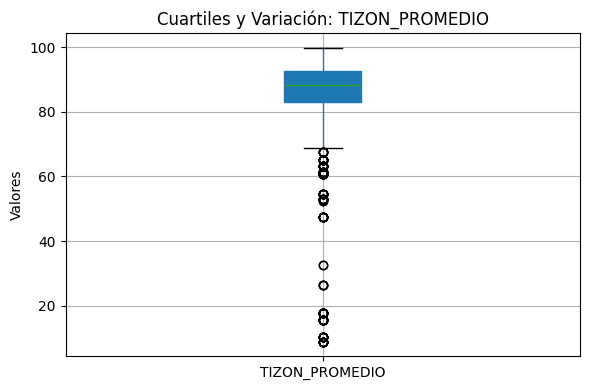

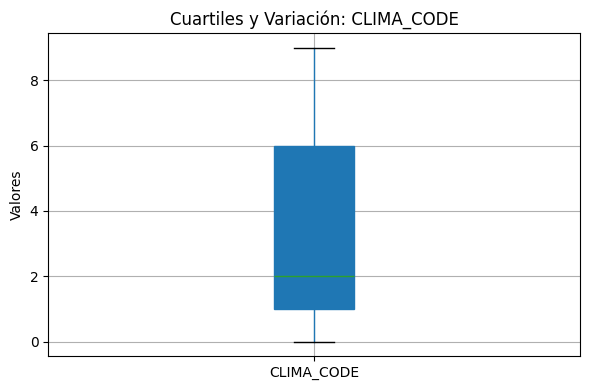

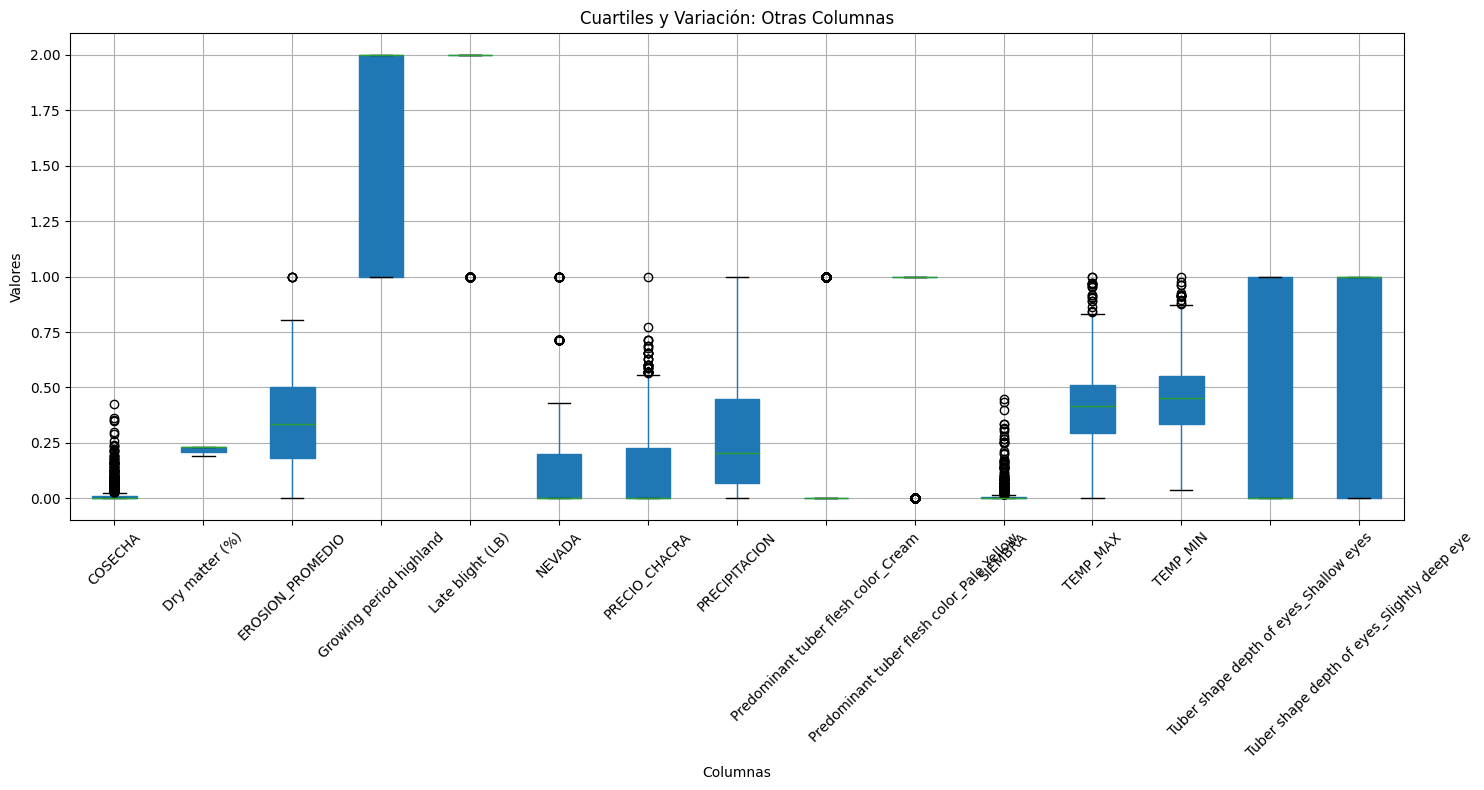

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset transformado
ruta_modelo_transformed = "/content/df_modelo_transformed.csv"
df_modelo_transformed = pd.read_csv(ruta_modelo_transformed)

# Boxplot para TIZON_PROMEDIO
plt.figure(figsize=(6, 4))
df_modelo_transformed.boxplot(column=['TIZON_PROMEDIO'], patch_artist=True)
plt.title('Cuartiles y Variación: TIZON_PROMEDIO')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

# Boxplot para CLIMA_CODE
plt.figure(figsize=(6, 4))
df_modelo_transformed.boxplot(column=['CLIMA_CODE'], patch_artist=True)
plt.title('Cuartiles y Variación: CLIMA_CODE')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

# Boxplot para las demás columnas
cols_to_plot = df_modelo_transformed.columns.difference(['TIZON_PROMEDIO', 'CLIMA_CODE'])
plt.figure(figsize=(15, 8))
df_modelo_transformed[cols_to_plot].boxplot(rot=45, patch_artist=True)
plt.title('Cuartiles y Variación: Otras Columnas')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()


##### Preparamos los datos para testeo y entrenamiento

In [110]:
from sklearn.model_selection import train_test_split

# Definir características (X) y etiquetas (y)
features = ['TEMP_MAX', 'TIZON_PROMEDIO', 'TEMP_MIN', 'PRECIPITACION',
            'NEVADA', 'EROSION_PROMEDIO', 'SIEMBRA', 'COSECHA', 'PRECIO_CHACRA', 'CLIMA_CODE']
labels = ['Late blight (LB)', 'Dry matter (%)', 'Growing period highland',
          'Predominant tuber flesh color_Cream', 'Predominant tuber flesh color_Pale Yellow',
          'Tuber shape depth of eyes_Shallow eyes', 'Tuber shape depth of eyes_Slightly deep eye']

# Dividir los datos en entrenamiento y prueba
X = df_modelo[features].values
y = df_modelo[labels].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Verificar las dimensiones de los conjuntos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


Dimensiones de X_train: (1408, 10)
Dimensiones de X_test: (353, 10)
Dimensiones de y_train: (1408, 7)
Dimensiones de y_test: (353, 7)


 ##### INSTANCIAMOS Y ENTRENAMOS EL MODELO

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 32.6123 - mean_squared_error: 32.6123 - val_loss: 1.1494 - val_mean_squared_error: 1.1494
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6311 - mean_squared_error: 2.6311 - val_loss: 1.1355 - val_mean_squared_error: 1.1355
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6512 - mean_squared_error: 1.6512 - val_loss: 1.1229 - val_mean_squared_error: 1.1229
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3524 - mean_squared_error: 1.3524 - val_loss: 1.0522 - val_mean_squared_error: 1.0522
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1025 - mean_squared_error: 1.1025 - val_loss: 1.0082 - val_mean_squared_error: 1.0082
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9319 - mean_squared_error: 0.9319 - val_loss: 0.8339 - val_mean_squared_error: 0.8339
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8285 - mean_squared_error: 0.8285 - val_loss: 0.5555 - val_mean_squ

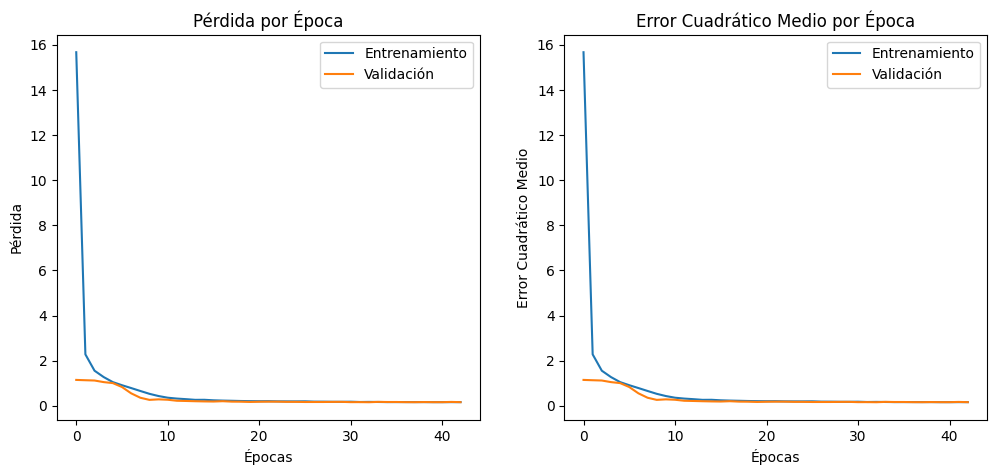

In [111]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Crear el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Primera capa oculta
    Dropout(0.3),  # Dropout para prevenir overfitting
    Dense(64, activation='relu'),  # Segunda capa oculta
    Dropout(0.2),
    Dense(32, activation='relu'),  # Tercera capa oculta
    Dense(y_train.shape[1], activation='linear')  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ]
)

# Evaluar el modelo en el conjunto de prueba
loss, mse = model.evaluate(X_test, y_test)
print(f"\nLoss en prueba: {loss}")
print(f"Mean Squared Error en prueba: {mse}")

# Graficar las métricas de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='Entrenamiento')
plt.plot(history.history['val_mean_squared_error'], label='Validación')
plt.title('Error Cuadrático Medio por Época')
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio')
plt.legend()

plt.show()


#####  EVALUAMOS EN LOS DATOS DE TESTEO CON 2 DIFERENTES METRICAS PARA CADA CARACTERISTICA PREDICHA

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predecir valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas (Loss y MAE) para cada característica sin redondear
print("Métricas por característica (sin redondeo):")
metrics = {}
for idx, column in enumerate(labels):
    mse = mean_squared_error(y_test[:, idx], y_pred[:, idx])
    mae = mean_absolute_error(y_test[:, idx], y_pred[:, idx])
    metrics[column] = {'MSE': mse, 'MAE': mae}



# Mostrar tabla con métricas
import pandas as pd
metrics_df = pd.DataFrame(metrics).T
print("\nTabla resumen de métricas (sin redondeo):")
print(metrics_df)

# Calcular el MSE y MAE globales para todo el output
global_mse = mean_squared_error(y_test.flatten(), y_pred.flatten())
global_mae = mean_absolute_error(y_test.flatten(), y_pred.flatten())

print(f"MSE Global (promedio de todas las características): {global_mse:.4f}")
print(f"MAE Global (promedio de todas las características): {global_mae:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Métricas por característica (sin redondeo):

Tabla resumen de métricas (sin redondeo):
                                                  MSE       MAE
Late blight (LB)                             0.115909  0.286278
Dry matter (%)                               0.000468  0.018998
Growing period highland                      0.264011  0.495872
Predominant tuber flesh color_Cream          0.145523  0.268506
Predominant tuber flesh color_Pale Yellow    0.153965  0.341611
Tuber shape depth of eyes_Shallow eyes       0.229151  0.422745
Tuber shape depth of eyes_Slightly deep eye  0.205617  0.441425
MSE Global (promedio de todas las características): 0.1592
MAE Global (promedio de todas las características): 0.3251


GUARDAMOS LE MODELO

In [119]:
export_path_keras = "/content/Trained_model_VectorToVector.keras"
model.save(export_path_keras)
print(f"Modelo exportado en formato Keras a: {export_path_keras}")


Modelo exportado en formato Keras a: /content/Trained_model_VectorToVector.keras
